In [30]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
from matplotlib.pyplot import *
import fileread as fr
import predefined as pd
from scipy.optimize import curve_fit

def multi_sum(multi,twindow=100,energy_type='energy'):
#     multi=data
    i,j=0,0
    count=0
    while i<len(multi)-1 and j<len(multi)-1:
        j=i+1
        backscattering=multi['timestamp'][j]-multi['timestamp'][i] < twindow
        energy=multi[energy_type][i]
        while backscattering and j<len(multi)-1:
            energy+=multi[energy_type][j]
            multi[energy_type][j]=-10
            j+=1
            backscattering=multi['timestamp'][j]-multi['timestamp'][i] < twindow
            count+=1
        multi[energy_type][i]=energy
        i=j
    print(count)
    return multi


path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
run=0
sim=np.load(path+'multi_{:d}_window-100_thresh-50.0-daq_filt.npy'.format(run))
run=120
data=np.load(path+'multi_{:d}_window-100_thresh-50.0.npy'.format(run))
sim,data=sim.view(np.recarray),data.view(np.recarray)
fs=53

# Looking at pre-multipixel summed spectra (64 E/W, 65W, 77E/W)
#### All cuts applied prior to the multipixel sum

(0.17453034897461717, 0.092398859160440883)


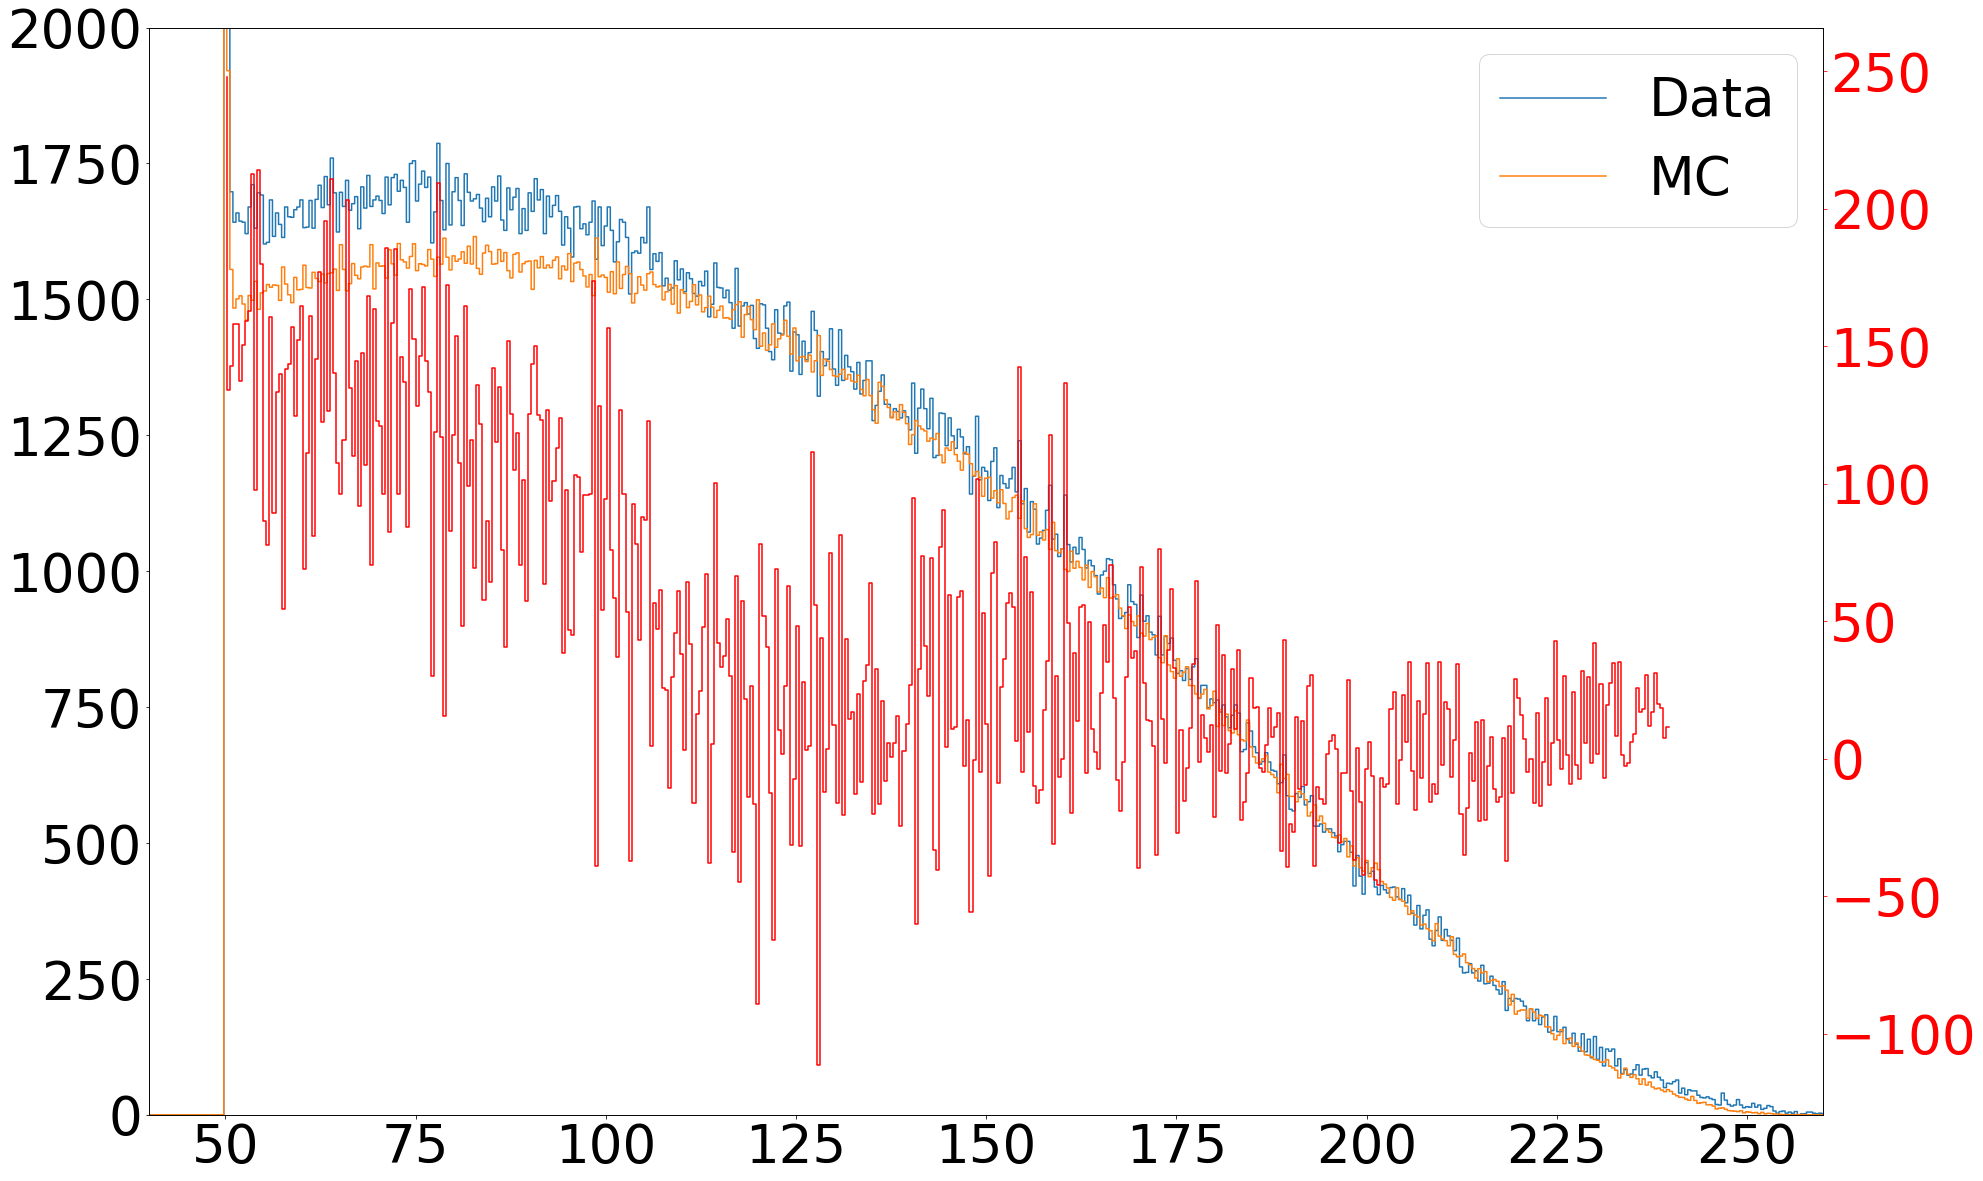

In [25]:
difs,labs=[],[]
sim_trutharray=np.zeros(len(sim),dtype=bool)
data_trutharray=np.zeros(len(data),dtype=bool)
for bdch in [11,12,35,41,17]:
    bd,ch = int(bdch/8), int(bdch%8)
    sim_trutharray+=(sim.board==bd)*(sim.channel==ch)
    data_trutharray+=(data.board==bd)*(data.channel==ch)

    
sim_hist=np.histogram(sim.energy[sim_trutharray],bins=1000,range=[0,400])[0]
data_hist,bins=np.histogram(data.energy[data_trutharray],bins=1000,range=[0,400])
sim_hist,data_hist=sim_hist.astype(float),data_hist.astype(float)
bins=pd.cbins(bins)
trutharray=(bins>100)*(bins<200)

prs,vrs=pd.Fierz_arb_norm_fit(simulation=sim_hist,data=data_hist,bins=bins)
print(prs[1],vrs[1])

norms=[np.sum(sim_hist[trutharray]),np.sum(data_hist[trutharray])]
normbin=400
norms=[sim_hist[normbin],data_hist[normbin]]
sim_hist*=norms[1]/norms[0]


fig,ax=subplots(figsize=(30,20))
ax.plot(bins,data_hist,ls='steps',label='Data')
ax.plot(bins,sim_hist,ls='steps',label='MC')

ax2=ax.twinx()
trutharray=(bins>50)*(bins<240)
difs.append(data_hist[trutharray]-sim_hist[trutharray]);labs.append('64E/W 65W 77E/W')

ax2.plot(bins[trutharray],data_hist[trutharray]-sim_hist[trutharray],color='r',ls='steps')
ax2.tick_params(labelsize=fs, colors='r')
ax.legend(fontsize=fs)
ax.set_ylim(0,2000)
ax.set_xlim(40,260)
ax.tick_params(labelsize=fs)
show()

# Looking at pre-multipixel summed spectra (64 E/W, 65W ONLY)
#### All cuts applied prior to the multipixel sum

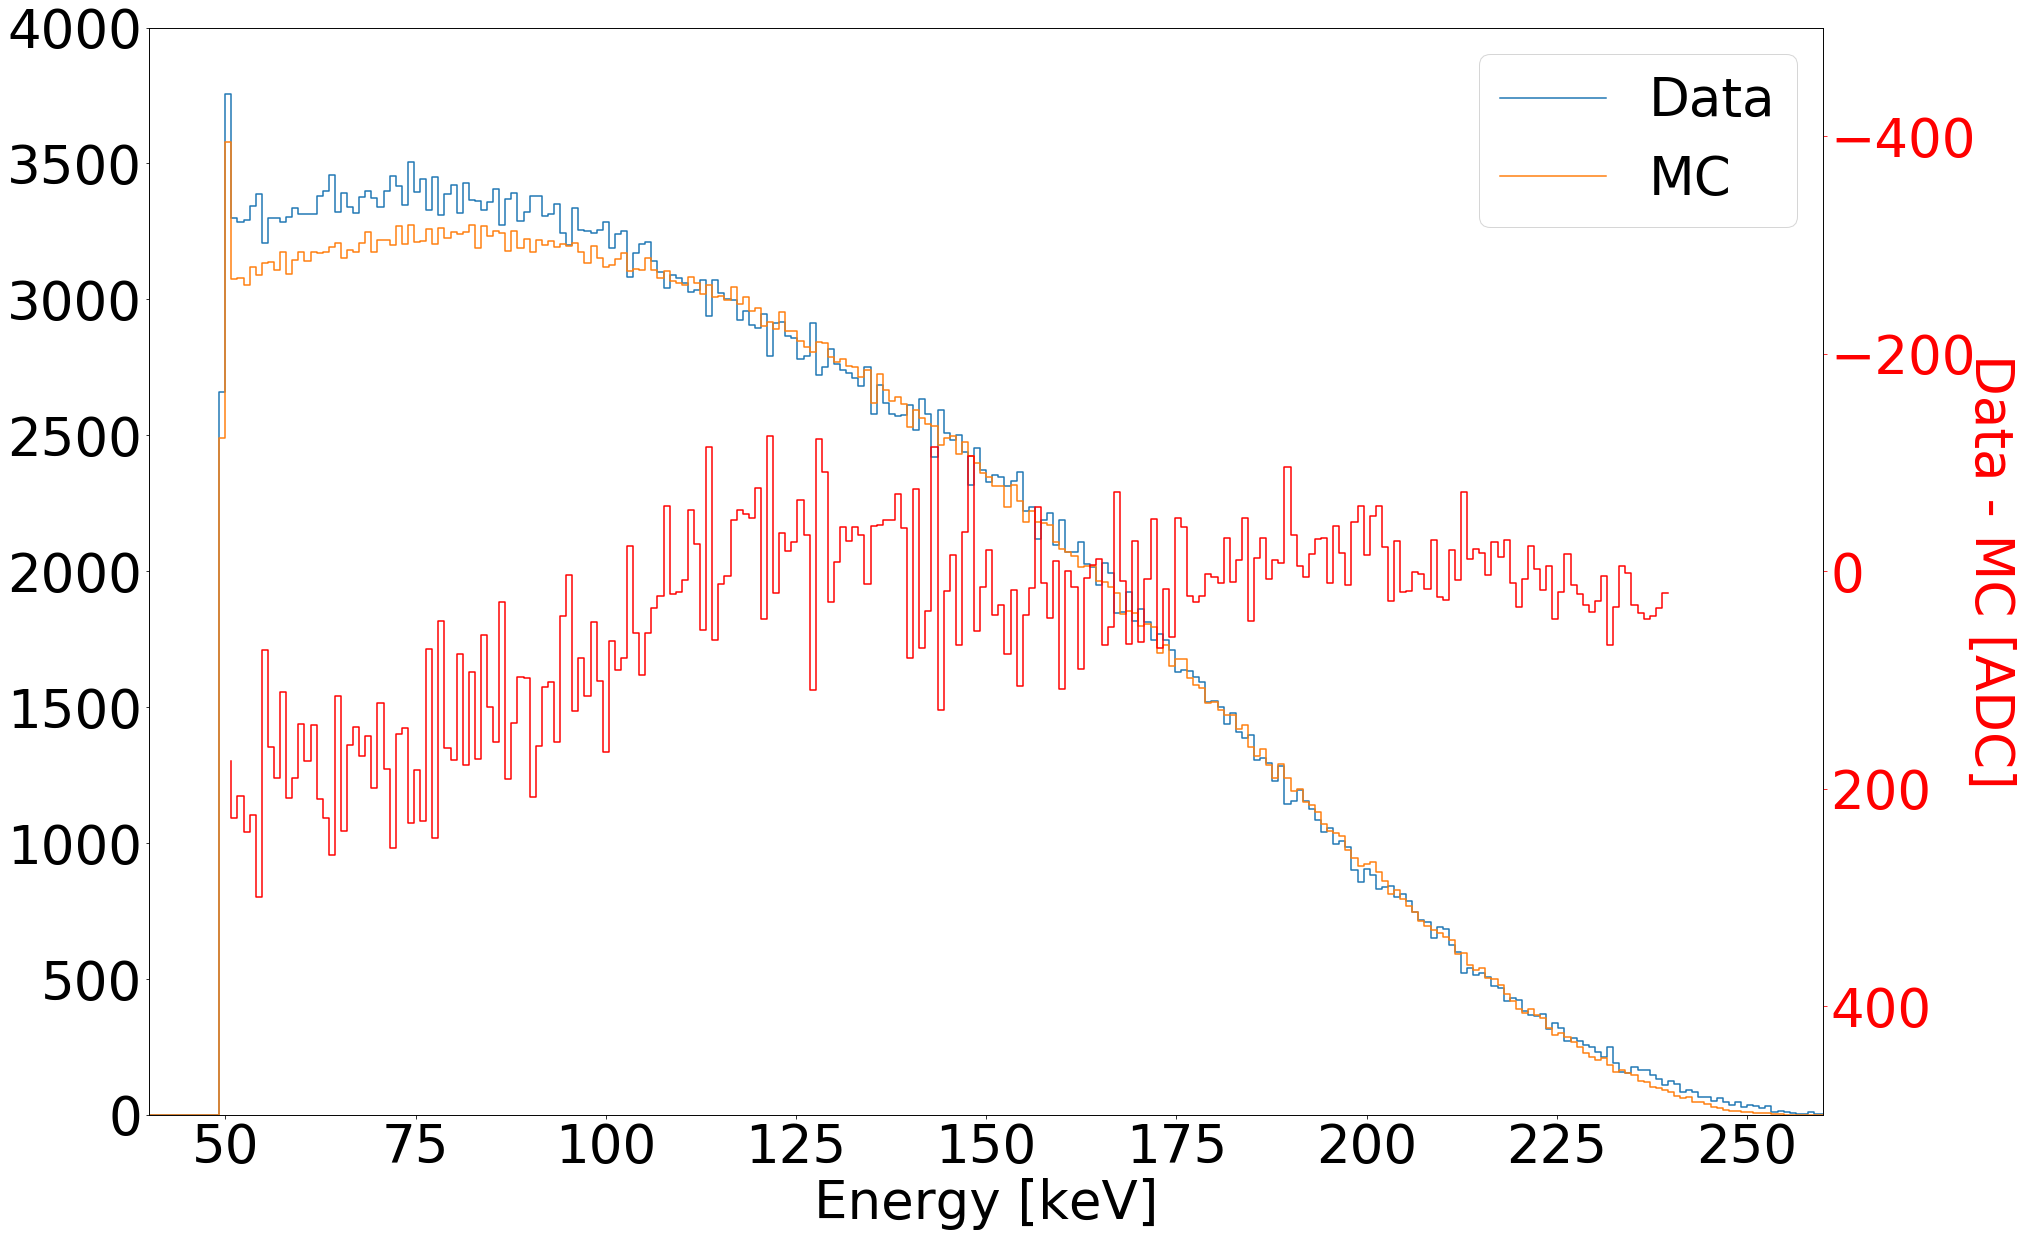

In [39]:
sim_trutharray=np.zeros(len(sim),dtype=bool)
data_trutharray=np.zeros(len(data),dtype=bool)
for bdch in [11,12,35]:
    bd,ch = int(bdch/8), int(bdch%8)
    sim_trutharray+=(sim.board==bd)*(sim.channel==ch)
    data_trutharray+=(data.board==bd)*(data.channel==ch)

bins,rang=500,[0,400]    
sim_hist=np.histogram(sim.energy[sim_trutharray],bins=bins,range=rang)[0]
data_hist,bins=np.histogram(data.energy[data_trutharray],bins=bins,range=rang)
sim_hist,data_hist=sim_hist.astype(float),data_hist.astype(float)
bins=pd.cbins(bins)
trutharray=(bins>100)*(bins<200)
norms=[np.sum(sim_hist[trutharray]),np.sum(data_hist[trutharray])]
sim_hist*=norms[1]/norms[0]
fig,ax=subplots(figsize=(30,20))
ax.plot(bins,data_hist,ls='steps',label='Data')
ax.plot(bins,sim_hist,ls='steps',label='MC')

ax2=ax.twinx()
trutharray=(bins>50)*(bins<240)
difs.append(data_hist[trutharray]-sim_hist[trutharray]);labs.append('64E/W 65W')

ax2.plot(bins[trutharray],data_hist[trutharray]-sim_hist[trutharray],color='r',ls='steps')
ax2.tick_params(labelsize=fs, colors='r')
ax2.set_ylabel('Data - MC [ADC]', fontsize=fs, rotation=270, labelpad=40, color='r')
ax.legend(fontsize=fs)
ax.set_ylim(0,4000)
ax2.set_ylim(500,-500)
ax.set_xlim(40,260)
ax.tick_params(labelsize=fs)
ax.set_xlabel('Energy [keV]',fontsize=fs)
savefig('./plots/data_vs_daqfilt_MC')
show()

In [20]:
multi_sim,multi_data=multi_sum(sim),multi_sum(data)

23880
12857


# Looking at summed spectra (64 E/W, 65W, 77E/W)

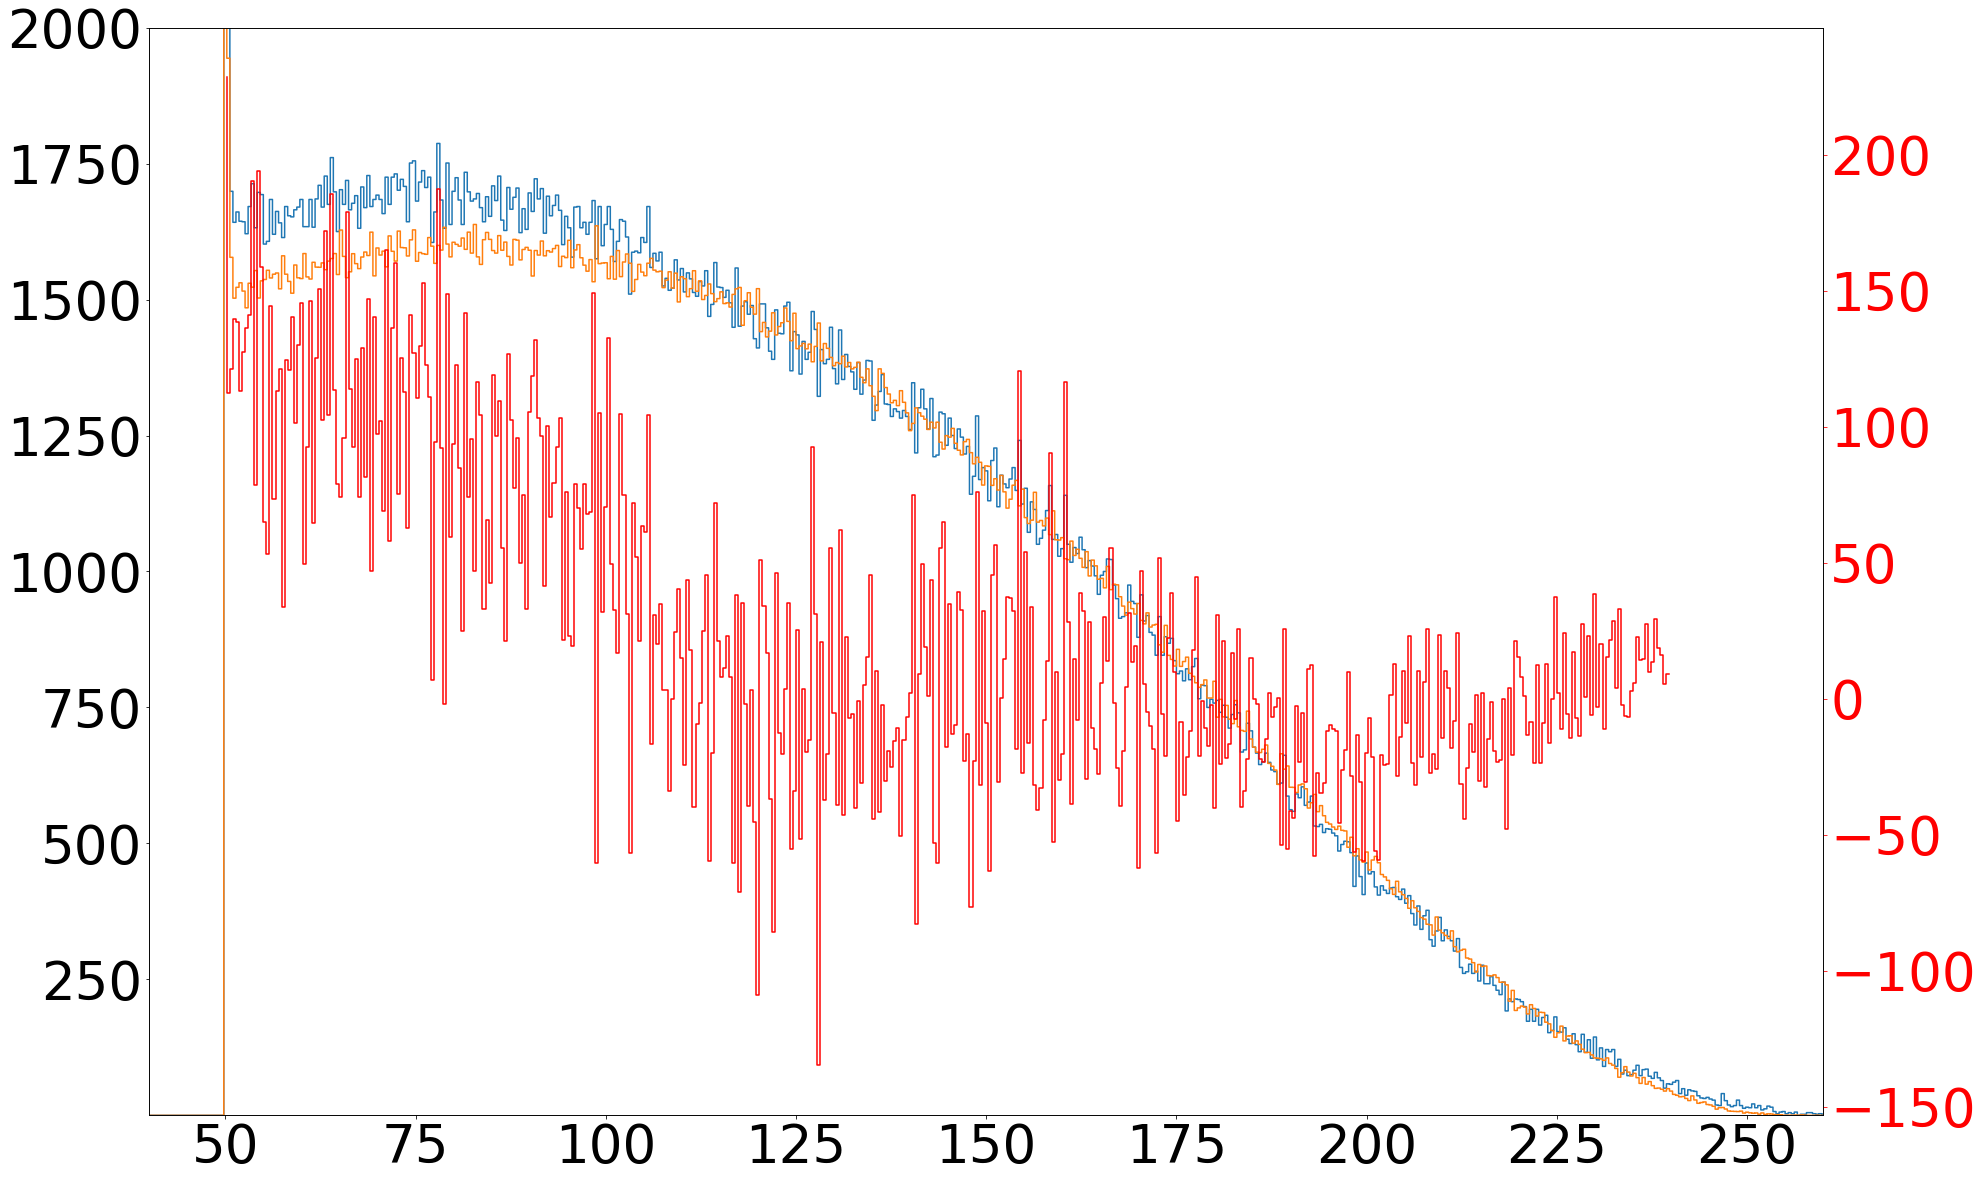

In [21]:
multi_sim,multi_data=multi_sim.view(np.recarray),multi_data.view(np.recarray)
sim_hist=np.histogram(multi_sim.energy,bins=1000,range=[0,400])[0]
data_hist,bins=np.histogram(multi_data.energy,bins=1000,range=[0,400])
sim_hist,data_hist=sim_hist.astype(float),data_hist.astype(float)
bins=pd.cbins(bins)
trutharray=(bins>100)*(bins<200)
norms=[np.sum(sim_hist[trutharray]),np.sum(data_hist[trutharray])]
sim_hist*=norms[1]/norms[0]
fig,ax=subplots(figsize=(30,20))
ax.plot(bins,data_hist,ls='steps',label='Data')
ax.plot(bins,sim_hist,ls='steps',label='MC')

ax2=ax.twinx()
trutharray=(bins>50)*(bins<240)
difs.append(data_hist[trutharray]-sim_hist[trutharray]);labs.append('Multi -all pix')
ax2.plot(bins[trutharray],data_hist[trutharray]-sim_hist[trutharray],color='r',ls='steps')
ax2.tick_params(labelsize=fs, colors='r')

ax.set_ylim(1,2000)
ax.set_xlim(40,260)
ax.tick_params(labelsize=fs)
show()

In [22]:
sim_trutharray=np.zeros(len(sim),dtype=bool)
data_trutharray=np.zeros(len(data),dtype=bool)
for bdch in [11,12,35]:
    bd,ch = int(bdch/8), int(bdch%8)
    sim_trutharray+=(sim.board==bd)*(sim.channel==ch)
    data_trutharray+=(data.board==bd)*(data.channel==ch)
multi_sim,multi_data=multi_sum(sim[sim_trutharray]),multi_sum(data[data_trutharray])

15939
8698


# Looking at pre-multipixel summed spectra (64 E/W, 65W ONLY)
#### Note: All extra must (were) be cut prior to the sum

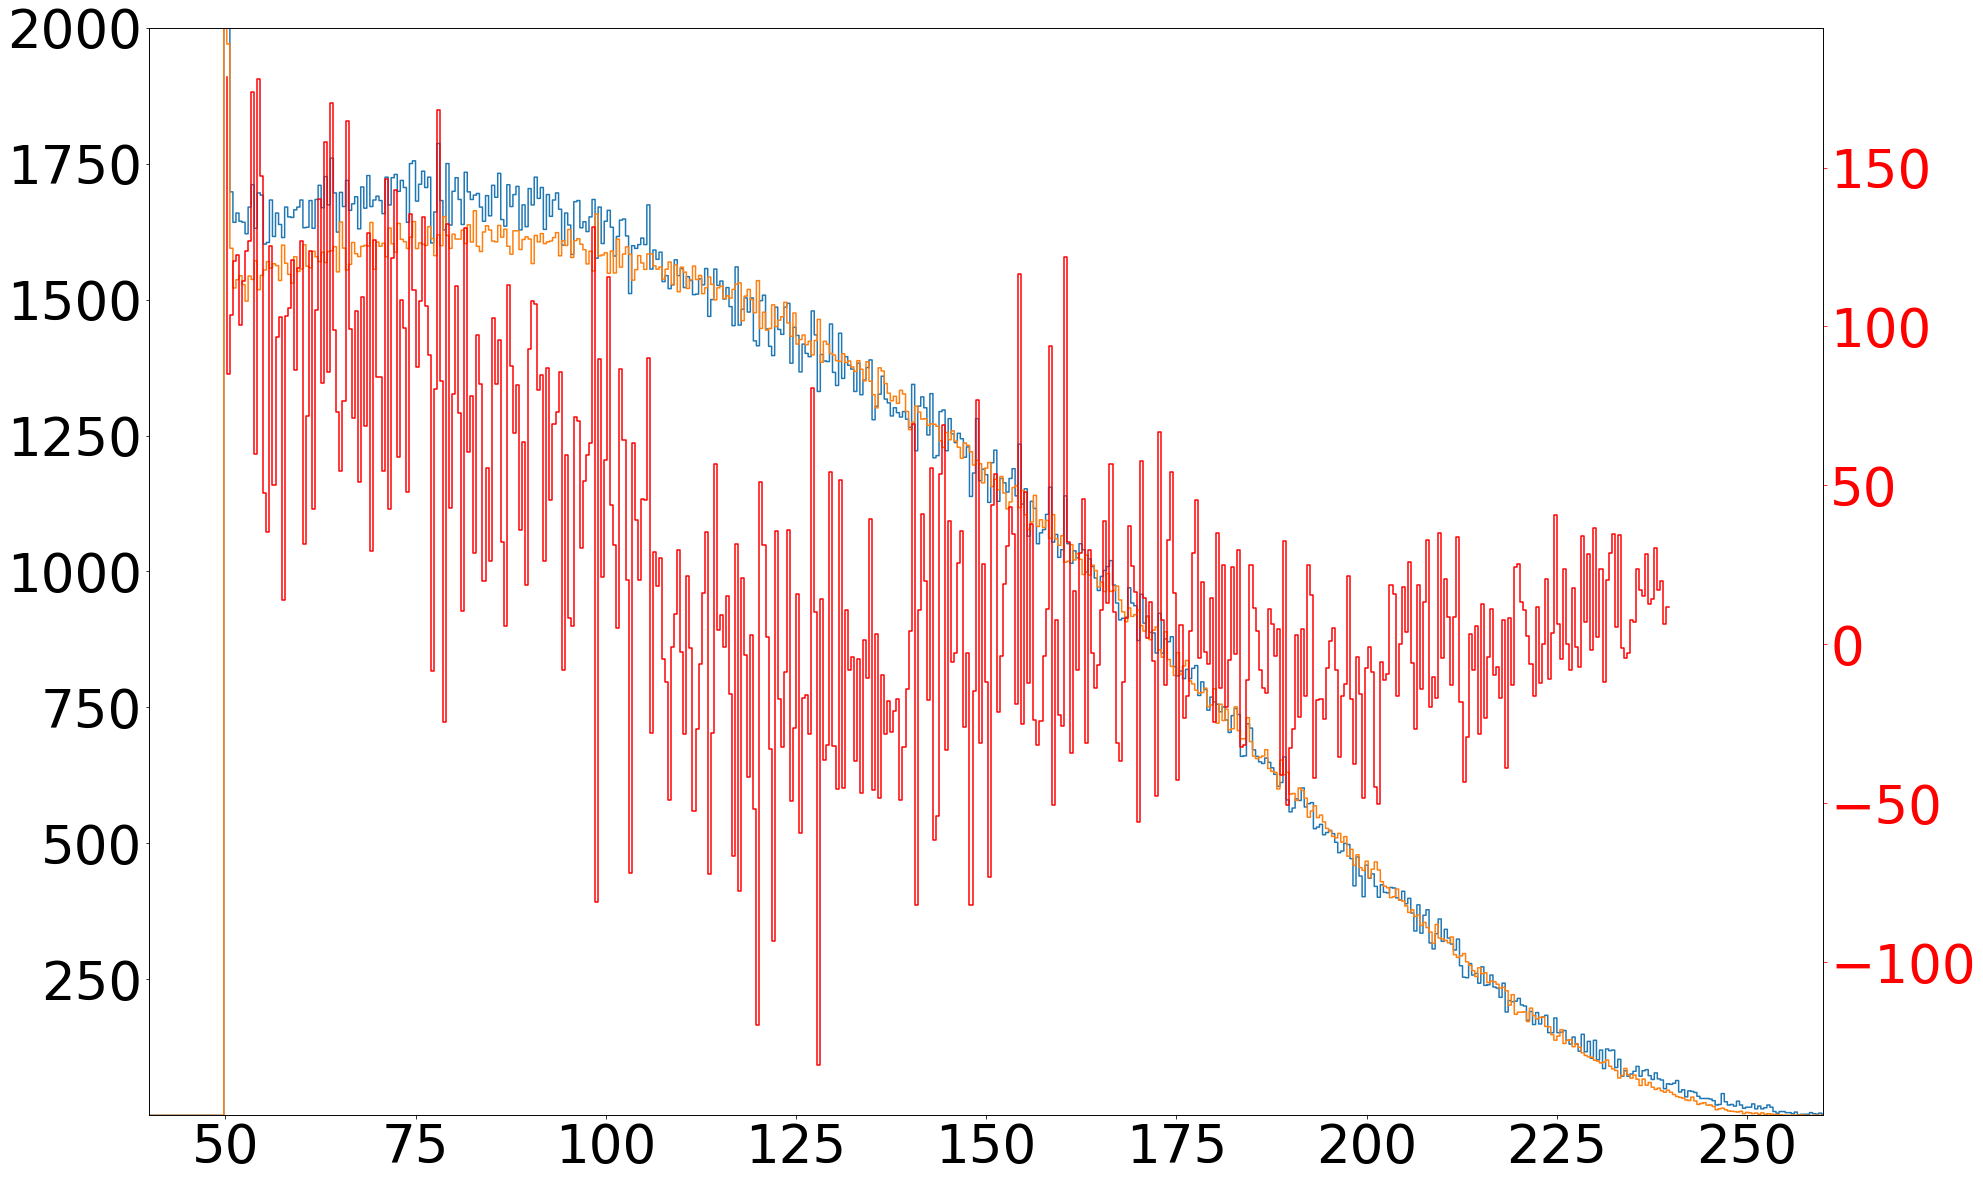

In [23]:
multi_sim,multi_data=multi_sim.view(np.recarray),multi_data.view(np.recarray)
sim_hist=np.histogram(multi_sim.energy,bins=1000,range=[0,400])[0]
data_hist,bins=np.histogram(multi_data.energy,bins=1000,range=[0,400])
sim_hist,data_hist=sim_hist.astype(float),data_hist.astype(float)
bins=pd.cbins(bins)
trutharray=(bins>100)*(bins<200)
norms=[np.sum(sim_hist[trutharray]),np.sum(data_hist[trutharray])]
sim_hist*=norms[1]/norms[0]
fig,ax=subplots(figsize=(30,20))
ax.plot(bins,data_hist,ls='steps',label='Data')
ax.plot(bins,sim_hist,ls='steps',label='MC')

ax2=ax.twinx()
trutharray=(bins>50)*(bins<240)
difs.append(data_hist[trutharray]-sim_hist[trutharray]);labs.append('Multi- 3 central')
ax2.plot(bins[trutharray],data_hist[trutharray]-sim_hist[trutharray],color='r',ls='steps')
ax2.tick_params(labelsize=fs, colors='r')

ax.set_ylim(1,2000)
ax.set_xlim(40,260)
ax.tick_params(labelsize=fs)
show()

# Comparing the effect of missing 77 and 65E prior to and after the sum
#### The residuals for the multi's have been shifted up by 200 

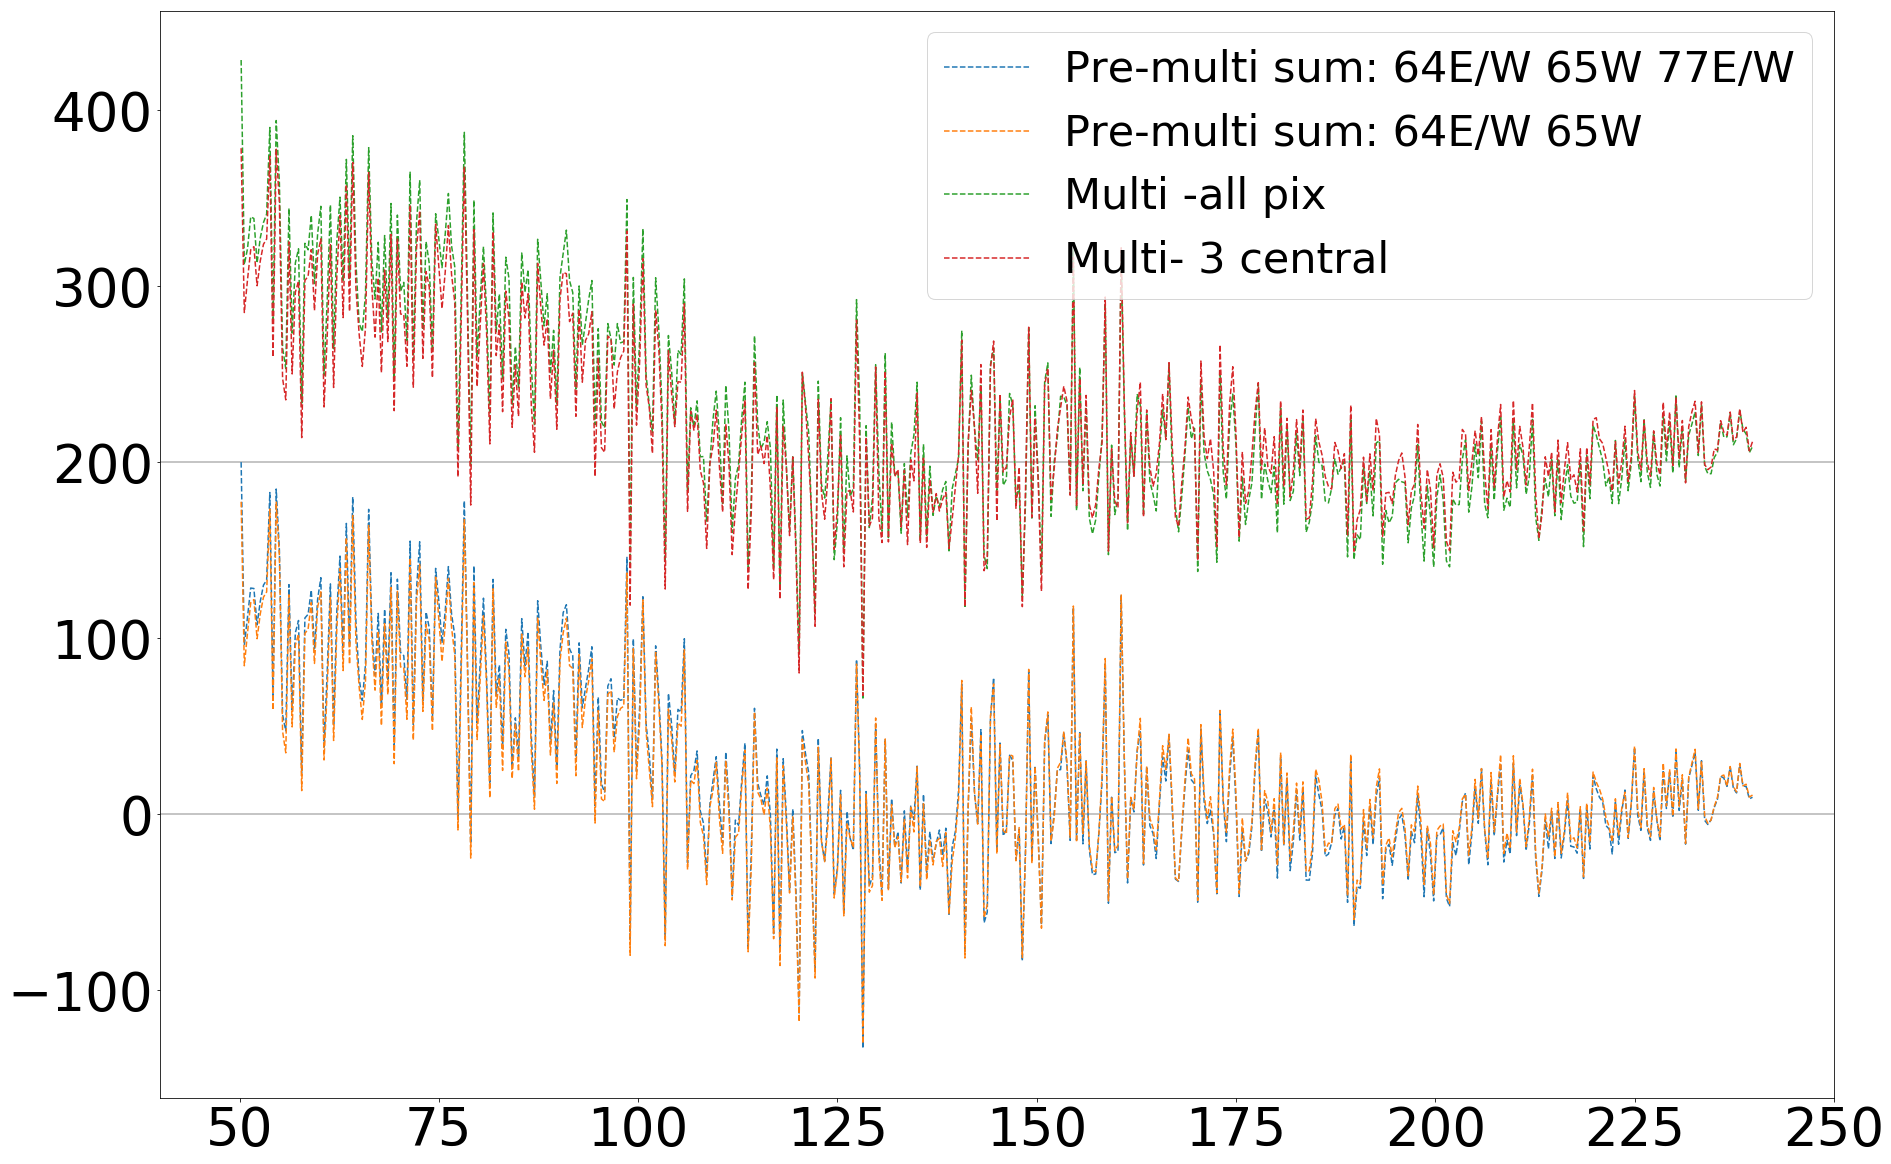

In [24]:
fig,ax=subplots(figsize=(30,20))
trutharray=(bins>50)*(bins<240)
ax.plot((0,300),(200,200),color='0.7',ls='-')
ax.plot((0,300),(0,0),color='0.7',ls='-')
for i,dif in enumerate(difs):
    if i<2:
        ax.plot(bins[trutharray],dif,ls='--',label='Pre-multi sum: '+labs[i])
    else:
        ax.plot(bins[trutharray],dif+200,ls='--',label=labs[i])
ax.set_xlim(40,250)
ax.legend(fontsize=fs-10)
ax.tick_params(labelsize=fs)
show()